<a href="https://colab.research.google.com/github/ELBrown11/Analyzing-TV-Data/blob/main/Copy_of_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## Dataset 2
[Data Science and STEM Salaries](https://www.kaggle.com/jackogozaly/data-science-and-stem-salaries)

In [4]:
filename2 = '/content/drive/MyDrive/Coding Dojo Bootcamp/Levels_Fyi_Salary_Data.csv'
df2 = pd.read_csv(filename2)
df2.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,20000.0,10000.0,NaN,NaN,7392,807.0,1,0,0,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,7419,807.0,2,0,0,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,0.0,0.0,NaN,NaN,11527,819.0,3,0,0,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,180000.0,35000.0,NaN,NaN,7472,807.0,7,0,0,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,7322,807.0,9,0,0,0,0,0,0,0,0,0,0,NaN,NaN


1. source of data
  - data is from [Kaggle](https://www.kaggle.com/jackogozaly/data-science-and-stem-salaries)

2. bried description of data
  - the data is 62000 salary record from top companies
3. what is the target?
  - base salary or totalyearlycompensation
4. is this a classification or regression problem?
  - regression problem
5. how many features?
  - possibly 27 features unless some of the columns are removed
6. how many rows of data?
  - 62642 rows of data
7. what, if any challenges do you forsee in cleaning, exploring and modeling with this data set?
  - figuring out why certain data is missing/ what to do with it
  - which columns to drop


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62642 non-null  object 
 1   company                  62637 non-null  object 
 2   level                    62523 non-null  object 
 3   title                    62642 non-null  object 
 4   totalyearlycompensation  62642 non-null  int64  
 5   location                 62642 non-null  object 
 6   yearsofexperience        62642 non-null  float64
 7   yearsatcompany           62642 non-null  float64
 8   tag                      61788 non-null  object 
 9   basesalary               62642 non-null  float64
 10  stockgrantvalue          62642 non-null  float64
 11  bonus                    62642 non-null  float64
 12  gender                   43102 non-null  object 
 13  otherdetails             40137 non-null  object 
 14  cityid                

columns with missing data
- company (a few missing)
- level ( a few missing)
- tag (significan amount missing, like 1000)
- gender (significant amount missing, no other columns for it, seems like an important feature to not have data for? median impute this?)
- otherdetails (may drop this depending on contents)
- dmaid (a few missing)
- race (sgnificant amount missing, could drop and keep other race columnsi)
- education  sgnificant amount missing, could drop and keep other education columns)


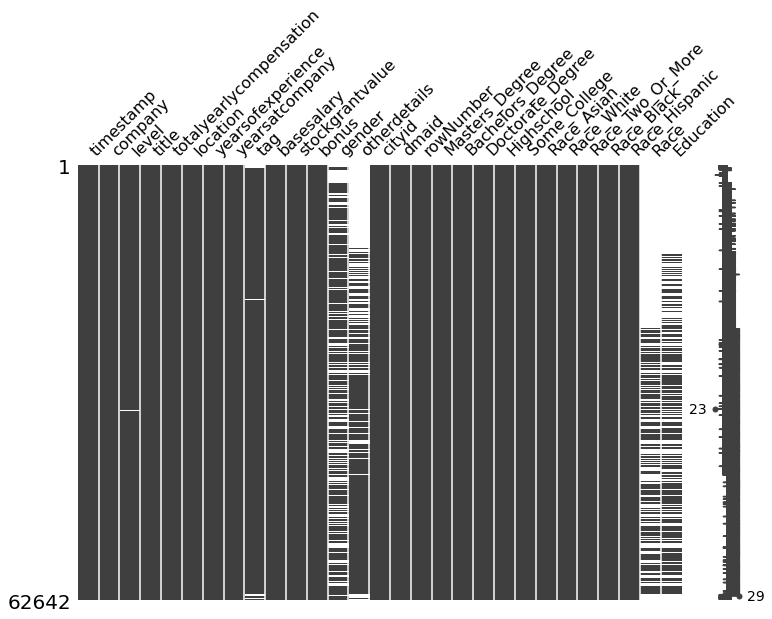

In [6]:
import missingno as msno

msno.matrix(df2, figsize=(12,8));

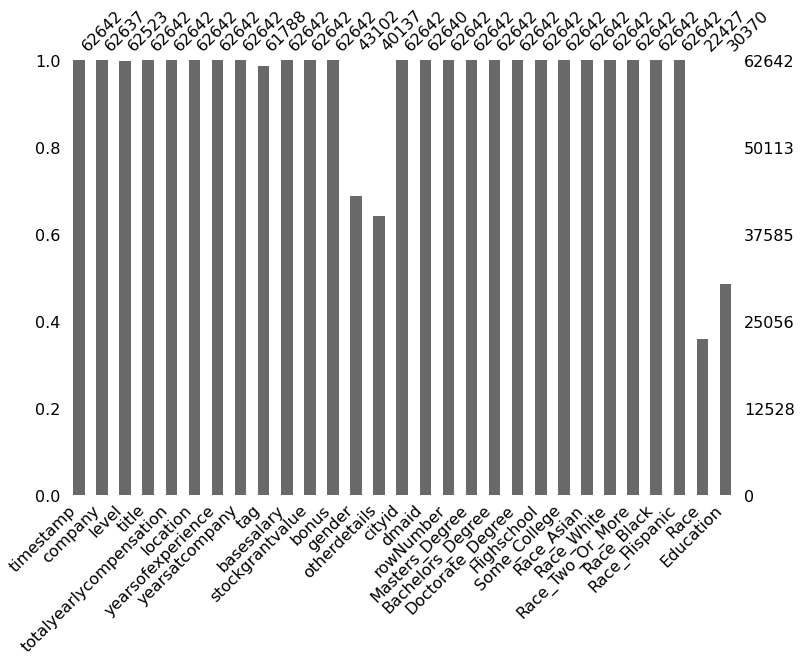

In [7]:
msno.bar(df2, figsize=(12,8));

In [8]:
df2.otherdetails.value_counts()

Masters                                                                                                                                                                                         3983
Title: Software Engineer                                                                                                                                                                        1453
Race: Asian, Academic Level: Master’s degree                                                                                                                                                    1213
Race: White, Academic Level: Bachelor’s degree                                                                                                                                                  1075
Race: Asian, Academic Level: Bachelor’s degree                                                                                                                                                   977
               

a lot of meta data which is covered in other columns will likely delete column

In [9]:
df2.dmaid.value_counts()

807.0    20400
819.0    12343
0.0       9826
501.0     5156
506.0     1773
         ...  
643.0        1
537.0        1
734.0        1
576.0        1
540.0        1
Name: dmaid, Length: 149, dtype: int64

In [10]:
df2.tag.value_counts()

Full Stack                        11382
Distributed Systems (Back-End)    10838
API Development (Back-End)         6277
ML / AI                            4204
Web Development (Front-End)        2971
                                  ...  
DRAM                                  1
Cloud Engineering                     1
Small Business                        1
Windows Desktop                       1
Strategic partnerships                1
Name: tag, Length: 3058, dtype: int64

seems like this data does tell much will probably delete column

In [11]:
df2.cityid.value_counts()

11527    8701
7419     6796
10182    4562
11521    2649
7322     2275
         ... 
12943       1
16508       1
12402       1
10257       1
36994       1
Name: cityid, Length: 1045, dtype: int64

In [12]:
df2.rowNumber.value_counts()

4094     1
533      1
12819    1
14866    1
8721     1
        ..
34042    1
40185    1
38136    1
60663    1
2049     1
Name: rowNumber, Length: 62642, dtype: int64

In [13]:
df2.duplicated().any().sum()

0

In [14]:
#make visuals for targets and features
#heatmap

corr = df2.corr()
corr.style.background_gradient()


,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
totalyearlycompensation,1.000000,0.422879,0.165802,0.672865,0.770756,0.489454,-0.110204,0.376346,-0.092622,0.018320,-0.139866,0.097179,-0.014831,-0.003380,-0.080072,-0.027802,-0.009623,-0.026741,-0.026145
yearsofexperience,0.422879,1.000000,0.522611,0.374437,0.289631,0.261051,-0.014100,0.030903,-0.002836,0.060310,-0.069468,-0.005380,0.011605,0.037925,-0.052659,0.064712,-0.013917,-0.022675,-0.002232
yearsatcompany,0.165802,0.522611,1.000000,0.145596,0.089492,0.108122,0.002984,0.043946,-0.012850,0.026109,-0.027487,0.001165,-0.005947,0.005718,-0.025888,0.047267,-0.014926,-0.027812,-0.007511
basesalary,0.672865,0.374437,0.145596,1.000000,0.468266,0.394352,-0.118651,0.425342,0.032603,0.084227,-0.104111,0.104320,-0.008534,0.006494,-0.053759,0.020324,0.002090,-0.008836,-0.008976
stockgrantvalue,0.770756,0.289631,0.089492,0.468266,1.000000,0.248151,-0.072429,0.227608,-0.041226,0.010720,-0.084676,0.080768,-0.008617,-0.001778,-0.040439,-0.020978,-0.006071,-0.029244,-0.020412
bonus,0.489454,0.261051,0.108122,0.394352,0.248151,1.000000,-0.036119,0.143506,-0.014753,0.031538,-0.062881,0.071844,-0.006916,-0.001873,-0.022997,-0.007798,0.001773,-0.004026,-0.006983
cityid,-0.110204,-0.014100,0.002984,-0.118651,-0.072429,-0.036119,1.000000,-0.104870,0.041289,-0.012902,0.053934,-0.018686,-0.012253,-0.005339,0.056143,-0.019097,-0.002999,0.012547,-0.003174
dmaid,0.376346,0.030903,0.043946,0.425342,0.227608,0.143506,-0.104870,1.000000,-0.202626,0.003325,-0.159571,0.040339,-0.038118,-0.009232,-0.093969,-0.087129,-0.009182,-0.005076,-0.010163
rowNumber,-0.092622,-0.002836,-0.012850,0.032603,-0.041226,-0.014753,0.041289,-0.202626,1.000000,0.181295,0.351730,0.029668,0.052255,0.050012,0.358515,0.261340,0.076943,0.068616,0.086191
Masters_Degree,0.018320,0.060310,0.026109,0.084227,0.010720,0.031538,-0.012902,0.003325,0.181295,1.000000,-0.286083,-0.076072,-0.040896,-0.043087,0.305903,0.036552,0.011023,0.014023,0.002330


strongest correlations with `totalyearlycompensation`: 
- `years of experience`: .42
-`basesalary`:.67
-`stockgrantvalue`:.77
-`bonus`:.49

suprising does show much correlations with education levels

also no strong correlation with race despite historical facts about racialized pay gaps

gender not included but will revist after imputing and ohe?


In [15]:
#creating new dataframe without irrelevant columns
df2_new = df2.drop(columns=['otherdetails','dmaid','rowNumber','Race','Education'])
df2_new.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,cityid,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,20000.0,10000.0,NaN,7392,0,0,0,0,0,0,0,0,0,0
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,7419,0,0,0,0,0,0,0,0,0,0
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,0.0,0.0,NaN,11527,0,0,0,0,0,0,0,0,0,0
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,180000.0,35000.0,NaN,7472,0,0,0,0,0,0,0,0,0,0
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,7322,0,0,0,0,0,0,0,0,0,0


In [16]:
df2_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62642 non-null  object 
 1   company                  62637 non-null  object 
 2   level                    62523 non-null  object 
 3   title                    62642 non-null  object 
 4   totalyearlycompensation  62642 non-null  int64  
 5   location                 62642 non-null  object 
 6   yearsofexperience        62642 non-null  float64
 7   yearsatcompany           62642 non-null  float64
 8   tag                      61788 non-null  object 
 9   basesalary               62642 non-null  float64
 10  stockgrantvalue          62642 non-null  float64
 11  bonus                    62642 non-null  float64
 12  gender                   43102 non-null  object 
 13  cityid                   62642 non-null  int64  
 14  Masters_Degree        

In [17]:
df2_new.gender.value_counts()

Male                               35702
Female                              6999
Other                                400
Title: Senior Software Engineer        1
Name: gender, dtype: int64

* need to remove `Title: Senior Software Engineer` value completely
* keep gender option other?
* simple imputer missing values via median strategy

In [18]:
gender_mode = df2_new['gender'].mode()
gender_mode

0    Male
dtype: object

In [19]:
#for loop that find that incorrect record then replaces it with the most frequent
#there's a break because there's only one of these values and a lot of data to loop through
for i in range(0, len(df2_new)):
  gender_mode = df2_new.gender.mode()[0]
  if (df2_new['gender'][i] == 'Title: Senior Software Engineer'):
    df2_new['gender'] = df2_new['gender'].replace('Title: Senior Software Engineer',gender_mode)
    break

In [20]:
df2_new['gender'].value_counts()

Male      35703
Female     6999
Other       400
Name: gender, dtype: int64

**indentifying inconsistencies in categorical values**

In [21]:
df2_new.company.value_counts()

Amazon         8126
Microsoft      5216
Google         4330
Facebook       2990
Apple          2028
               ... 
Liveperson        1
bcg               1
LogmeIn           1
BazaarVoice       1
canva             1
Name: company, Length: 1631, dtype: int64

In [22]:
df2_new.location.value_counts()

Seattle, WA                    8701
San Francisco, CA              6797
New York, NY                   4562
Redmond, WA                    2649
Mountain View, CA              2275
                               ... 
Feltham, EN, United Kingdom       1
Redmond, UT                       1
Hanover, MD                       1
Schenectady, NY                   1
Shingle Springs, CA               1
Name: location, Length: 1050, dtype: int64

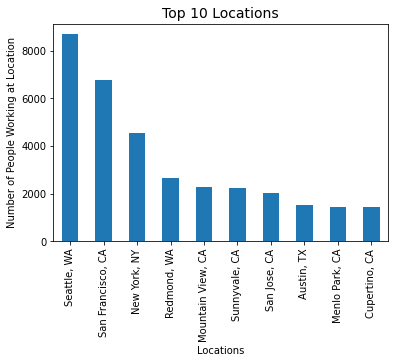

In [23]:
df2_new.location.value_counts()[:10].plot(kind='bar');
plt.title('Top 10 Locations', fontsize=14)
plt.xlabel('Locations')
plt.ylabel('Number of People Working at Location');

In [24]:
df2_new.title.value_counts()

Software Engineer               41231
Product Manager                  4673
Software Engineering Manager     3569
Data Scientist                   2578
Hardware Engineer                2200
Product Designer                 1516
Technical Program Manager        1381
Solution Architect               1157
Management Consultant             976
Business Analyst                  885
Marketing                         710
Mechanical Engineer               490
Sales                             461
Recruiter                         451
Human Resources                   364
Name: title, dtype: int64

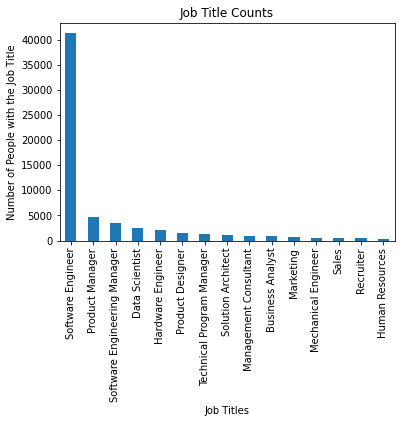

In [25]:
df2_new.title.value_counts().plot(kind='bar')
plt.title('Job Title Counts')
plt.xlabel('Job Titles')
plt.ylabel('Number of People with the Job Title');

In [26]:
#new heatmap
corr = df2_new.corr()
corr.style.background_gradient()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
totalyearlycompensation,1.000000,0.422879,0.165802,0.672865,0.770756,0.489454,-0.110204,0.018320,-0.139866,0.097179,-0.014831,-0.003380,-0.080072,-0.027802,-0.009623,-0.026741,-0.026145
yearsofexperience,0.422879,1.000000,0.522611,0.374437,0.289631,0.261051,-0.014100,0.060310,-0.069468,-0.005380,0.011605,0.037925,-0.052659,0.064712,-0.013917,-0.022675,-0.002232
yearsatcompany,0.165802,0.522611,1.000000,0.145596,0.089492,0.108122,0.002984,0.026109,-0.027487,0.001165,-0.005947,0.005718,-0.025888,0.047267,-0.014926,-0.027812,-0.007511
basesalary,0.672865,0.374437,0.145596,1.000000,0.468266,0.394352,-0.118651,0.084227,-0.104111,0.104320,-0.008534,0.006494,-0.053759,0.020324,0.002090,-0.008836,-0.008976
stockgrantvalue,0.770756,0.289631,0.089492,0.468266,1.000000,0.248151,-0.072429,0.010720,-0.084676,0.080768,-0.008617,-0.001778,-0.040439,-0.020978,-0.006071,-0.029244,-0.020412
bonus,0.489454,0.261051,0.108122,0.394352,0.248151,1.000000,-0.036119,0.031538,-0.062881,0.071844,-0.006916,-0.001873,-0.022997,-0.007798,0.001773,-0.004026,-0.006983
cityid,-0.110204,-0.014100,0.002984,-0.118651,-0.072429,-0.036119,1.000000,-0.012902,0.053934,-0.018686,-0.012253,-0.005339,0.056143,-0.019097,-0.002999,0.012547,-0.003174
Masters_Degree,0.018320,0.060310,0.026109,0.084227,0.010720,0.031538,-0.012902,1.000000,-0.286083,-0.076072,-0.040896,-0.043087,0.305903,0.036552,0.011023,0.014023,0.002330
Bachelors_Degree,-0.139866,-0.069468,-0.027487,-0.104111,-0.084676,-0.062881,0.053934,-0.286083,1.000000,-0.086404,-0.035965,-0.037891,0.249846,0.352620,0.110800,0.104210,0.137807
Doctorate_Degree,0.097179,-0.005380,0.001165,0.104320,0.080768,0.071844,-0.018686,-0.076072,-0.086404,1.000000,-0.012336,-0.012996,0.034015,0.040215,0.000728,-0.006276,0.006080


In [28]:
#df_loc = df2_new.so

#sns.barplot(x='location', y='totalyearlycompensation',data=df_loc,
            palette='Blues_d');
plt.xticks(rotation=90);

NameError: ignored

In [80]:
#records for 25 highest totalyearlycompensation
top_25 = df2_new.sort_values('totalyearlycompensation', ascending=False)[:25]
top_25

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,cityid,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
61991,7/30/2021 22:23:24,Facebook,E9,Product Manager,4980000,"Menlo Park, CA",17.0,0.0,Product,380000.0,4400.0,200000.0,Male,7300,1,0,0,0,0,1,0,0,0,0
61967,8/20/2019 15:35:10,Microsoft,80,Software Engineering Manager,4950000,"Redmond, WA",24.0,8.0,ML / AI,850000.0,3750.0,350000.0,Male,11521,0,0,0,0,0,0,0,0,0,0
61982,3/9/2021 17:03:07,Google,L10,Product Manager,4500000,"San Francisco, CA",20.0,14.0,Consumer,450000.0,3700.0,350000.0,Male,7419,1,0,0,0,0,1,0,0,0,0
61990,7/2/2021 8:43:37,Facebook,E9,Software Engineer,4490000,"Menlo Park, CA",13.0,9.0,Full Stack,350000.0,4000.0,140000.0,NaN,7300,0,0,0,0,0,0,0,0,0,0
61969,9/28/2019 9:57:21,Snap,L8,Software Engineering Manager,2500000,"Los Angeles, CA",20.0,4.0,Distributed Systems (Back-End),400000.0,2100.0,0.0,Male,7275,0,0,0,0,0,0,0,0,0,0
61987,5/18/2021 15:34:21,Facebook,D1,Software Engineering Manager,2372000,"Menlo Park, CA",22.0,2.0,ML / AI,315000.0,1933.0,124000.0,Male,7300,1,0,0,0,0,0,0,0,1,0
61985,4/19/2021 11:45:01,Facebook,D1,Software Engineering Manager,2200000,"Menlo Park, CA",20.0,3.0,Distributed Systems (Back-End),310000.0,1700.0,190000.0,NaN,7300,0,0,0,0,0,0,0,0,0,0
61972,5/8/2020 7:57:27,SoFi,EVP,Software Engineering Manager,2000000,"San Francisco, CA",20.0,2.0,Full Stack,400000.0,1200.0,400000.0,Male,7419,0,0,0,0,0,0,0,0,0,0
61974,8/18/2020 7:22:07,Google,L8,Software Engineering Manager,1950000,"Mountain View, CA",21.0,8.0,Mobile (iOS + Android),350000.0,1450.0,150000.0,NaN,7322,0,0,0,0,0,0,0,0,0,0
61989,6/24/2021 19:29:24,Uber,Sr Director,Product Manager,1900000,"San Francisco, CA",23.0,6.0,Product,300000.0,1400.0,200000.0,NaN,7419,0,0,0,0,0,0,0,0,0,0


In [69]:
top_25.company.value_counts()

Facebook     9
Google       6
Microsoft    3
Uber         2
Amazon       1
BCG          1
SoFi         1
Zapier       1
Snap         1
Name: company, dtype: int64

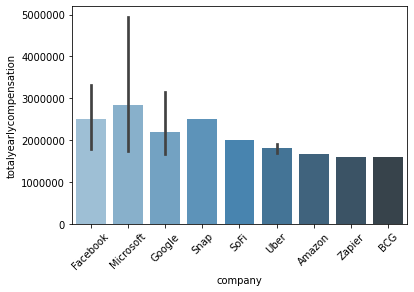

In [77]:
sns.barplot(x='company', y='totalyearlycompensation',data=top_25, palette='Blues_d')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45);

In [58]:
top_25.Masters_Degree.value_counts()

0    18
1     7
Name: Masters_Degree, dtype: int64

In [59]:
top_25.Bachelors_Degree.value_counts()

0    24
1     1
Name: Bachelors_Degree, dtype: int64

In [60]:
top_25.Doctorate_Degree.value_counts()

0    25
Name: Doctorate_Degree, dtype: int64

In [61]:
top_25.yearsofexperience.value_counts()

20.0    5
25.0    3
24.0    3
18.0    2
23.0    2
21.0    2
10.0    1
16.0    1
15.0    1
30.0    1
27.0    1
22.0    1
13.0    1
17.0    1
Name: yearsofexperience, dtype: int64

- 

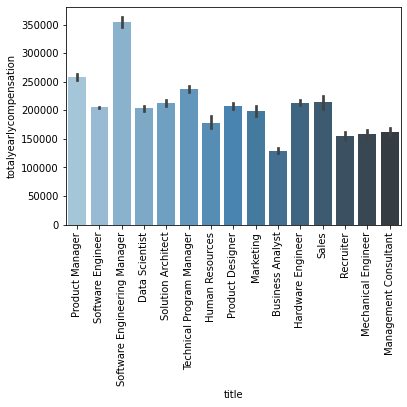

In [52]:

sns.barplot(x='title', y='totalyearlycompensation', data=df2_new, palette='Blues_d')
plt.xticks(rotation=90);


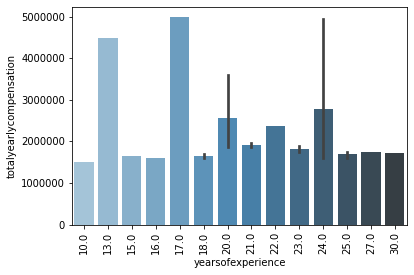

In [78]:
sns.barplot(x='yearsofexperience', y='totalyearlycompensation', data=top_25, palette='Blues_d')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90);